In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from seaborn import objects as so

In [2]:
# pour avoir toujours les mêmes valeurs aléatoires
random.seed(0)

# Python - Analyse de données

<img src="img/logo.png" alt="Python" style="height: 200px"/>

**Contenu**

- [Numpy](#/1) : array
- [Pandas](#/2) : dataframe
- [Matplotlib](#/3): graphiques
- [Seaborn](#/4) : graphiques avancés  

*Chargement d'un jeu de données, nettoyage et préparation des données, statistiques descriptives, visualisation des données*

[Pour aller plus loin](#/5)

# NumPy

<img src="img/numpy.png" alt="Numpy Logo" style="height: 200px"/>

**NumPy = Numerical Python**

- bibliothèque open-source pour le **calcul scientifique et l'analyse de données**
- largement utilisée dans la **communauté scientifique et de l'ingénierie**
- compatible avec de nombreuses autres bibliothèques de science des données, comme **pandas, matplotlib et scipy**
- fournit un **tableau multidimensionnel** puissant et efficace (l'objet `array`) plus performant que les listes pour les calculs
- **syntaxe concise et intuitive** pour manipuler les tableaux
- offre un large éventail de **fonctions mathématiques et statistiques**

par convention 

```python
import numpy as np
```

<https://numpy.org/>


## Tableau

Le tableau NumPy (**`array`**) est proche d'une liste excepté : 

- tous les éléments du tableau doivent être du même type
- il existe un ensemble de méthodes spécifiques

Un tableau peut se créer à **partir d'une liste** ou de **méthodes spécifiques**.

### Tableau unidimensionnel

**_A partir d'une liste_**

In [3]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

**_Avec `arange(start, stop, step)`_**, équivalent de `range`

In [4]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**_step_** peut être décimal

In [5]:
np.arange(0, 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

**_Avec `linspace(start, stop, num)`_**, où *num* est le nombre de valeurs souhaitées  
Renvoie un tableau avec des valeurs uniformément espacées

In [6]:
np.linspace(1, 6, 3)

array([1. , 3.5, 6. ])

**_Avec `zeros(num)`_**, crée un tableau avec uniquement des 0

In [7]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

**_Avec `ones(num)`_**, crée un tableau avec uniquement des 1

In [8]:
np.ones(5)

array([1., 1., 1., 1., 1.])

**_Avec les méthodes de `np.random`: `random` et `randint`_**

In [9]:
np.random.random(5)

array([0.55943399, 0.01920226, 0.89511501, 0.69242079, 0.61645405])

In [10]:
np.random.randint(1, 10, 3)

array([9, 4, 8])

Le tableau est un **objet ordonné indexé**, fonctionnant comme les listes

In [11]:
mon_tableau = np.arange(1, 5)
mon_tableau

array([1, 2, 3, 4])

In [12]:
mon_tableau[2]

3

In [13]:
mon_tableau[:3]

array([1, 2, 3])

In [14]:
mon_tableau[-1]

4

In [15]:
mon_tableau[::2]

array([1, 3])

### Tableau multi-dimensionnel

**_A partir d'une liste multi-dimensionnelle_**

In [16]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

L'attribut **`shape`** d'un `array` affiche ses dimensions

In [17]:
np.array([[1, 2], [3, 4]]).shape

(2, 2)

2 lignes et 2 colonnes

**_Avec `np.zeros`, `np.ones`, `np.random.random` et `np.random.randint`_** en appelant les fonctions avec un tuple qui précise les dimensions

In [18]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [19]:
np.random.random((3, 3))

array([[0.47166704, 0.24687743, 0.73694649],
       [0.81068237, 0.4966517 , 0.64583676],
       [0.60934693, 0.81573954, 0.59676208]])

### Manipulation de la forme d'un tableau

#### `reshape`  

Permet de changer les dimensions

In [20]:
mon_tableau = np.arange(9)
mon_tableau

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [21]:
mon_tableau.reshape((3, 3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### `flatten`

Permet d'applatir un tableau (rendre unidimensionnel)

In [22]:
mon_tableau = np.arange(9).reshape((3, 3))
mon_tableau

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [23]:
mon_tableau.flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

#### `transpose`

Avec `np.transpose` ou l'attribut `.T`  
Permet d'inverser les lignes et les colonnes

In [24]:
mon_tableau = np.arange(6).reshape((3, 2))
mon_tableau

array([[0, 1],
       [2, 3],
       [4, 5]])

In [25]:
mon_tableau.T

array([[0, 2, 4],
       [1, 3, 5]])

## Masquage logique

Le masquage logique permet de **sélectionner ou modifier des éléments dans un tableau NumPy en utilisant une condition logique**.

Une condition logique appliquée à un tableau génère un **masque booléen**.
Ce masque peut être utilisé **pour accéder aux éléments ou remplacer des valeurs**.

In [26]:
mon_tableau = np.arange(5)
mon_tableau

array([0, 1, 2, 3, 4])

**Masquage booléen**

In [27]:
mon_tableau > 2

array([False, False, False,  True,  True])

Utilisation du masquage booléen pour afficher **uniquement les valeurs `True`**

In [28]:
mon_tableau[mon_tableau > 2]

array([3, 4])

**Plusieurs conditions**, avec `()` et `&`

In [29]:
mon_tableau[(mon_tableau > 2) & (mon_tableau % 2 == 0)]

array([4])

## Opérations et Fonctions

### Opérations arithmétiques

Les opérations `+, -, *, /, **` sur un tableau sont appliquées **sur chaque élément du tableau**

In [30]:
mon_tableau = np.arange(5)
mon_tableau

array([0, 1, 2, 3, 4])

In [31]:
mon_tableau * 2

array([0, 2, 4, 6, 8])

Si **plusieurs tableaux** les opérations sont effectués entre chaque élément des tableaux

In [32]:
mon_tableau_1 = np.arange(5)
mon_tableau_1

array([0, 1, 2, 3, 4])

In [33]:
mon_tableau_2 = np.arange(5, 10)
mon_tableau_2

array([5, 6, 7, 8, 9])

In [34]:
mon_tableau_1 * mon_tableau_2

array([ 0,  6, 14, 24, 36])

### Opérations matricielles

Un tableau à 2 dimensions est une matrice.  
NumPy fournit des méthodes pour les calculs matriciels

#### Produit matriciel

Avec `@` ou `np.dot`

In [35]:
A = np.arange(4).reshape((2, 2))
B = np.arange(4, 8).reshape((2, 2))

In [36]:
np.dot(A, B)

array([[ 6,  7],
       [26, 31]])

In [37]:
A @ B

array([[ 6,  7],
       [26, 31]])

#### Calcul du déterminant

Le **déterminant d'une matrice carrée** est une valeur qui donne des informations sur les propriétés de la matrice (inversibilité).  
Le calcul se fait avec **`np.linalg.det`**

In [38]:
A = np.arange(1, 5).reshape((2, 2))
A

array([[1, 2],
       [3, 4]])

In [39]:
np.round(np.linalg.det(A), 2)

-2.0

#### Inversion de matrice

L'inverse d'une matrice carrée $A$ est notée $A^{-1}$, telle que $A . A^{-1} = I$ où $I$ est la matrice identité.  
Le calcul se fait avec **`np.linalg.inv`**

In [40]:
A = np.arange(1, 5).reshape((2, 2))
A

array([[1, 2],
       [3, 4]])

In [41]:
A_inv = np.linalg.inv(A)
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

On peut vérifier que $A . A^{-1} = I$

In [42]:
np.round(A @ A_inv, 2)

array([[1., 0.],
       [0., 1.]])

#### Création d'une matrice identité

**_Avec `np.eye`_**

In [43]:
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Fonctions d'agrégation 

Une fonction d'agrégation est une fonction qui **résume ou combine un ensemble de données en une seule valeur représentative**.

| **Fonction**      | **Description**                          |
|-------------------|------------------------------------------|
| **`np.sum`**      | Somme des éléments                      |
| **`np.mean`**     | Moyenne                                 |
| **`np.min`**      | Minimum                                 |
| **`np.max`**      | Maximum                                 |
| **`np.std`**      | Écart-type                              |
| **`np.var`**      | Variance                                |
| **`np.median`**   | Médiane                                 |
| **`np.prod`**     | Produit de tous les éléments            |
| **`np.cumsum`**   | Somme cumulative (élément par élément)  |
| **`np.cumprod`**  | Produit cumulatif                       |


In [44]:
notes = np.random.randint(0, 21, 10)
notes

array([ 9,  9, 11,  7, 17, 11,  1, 13,  8,  2])

In [45]:
np.mean(notes)

8.8

In [46]:
np.std(notes)

4.534313619501853

Les fonctions d'agrégation peuvent être **appliquées le long d'un axe spécifique** en utilisant le paramètre axis :

- **axis=0** : le long des colonnes
- **axis=1** : le long des lignes

In [47]:
mon_tableau = np.arange(6).reshape((2, 3))
mon_tableau

array([[0, 1, 2],
       [3, 4, 5]])

In [48]:
np.sum(mon_tableau, axis=0)

array([3, 5, 7])

In [49]:
np.sum(mon_tableau, axis=1)

array([ 3, 12])

## Pratique 

### Exercice 1

- Créer un tableau de 10 valeurs allant de 0 à 9 (inclus).
- Créer un tableau de dimension (3, 3) contenant des valeurs allant de 0 à 8 (inclus).
- Créer un tableau aléatoire de dimension (3, 3).
- Multiplier chaque du tableau aléatoire par 2.

### Exercice 2

- Créer un tableau 3 x 3 contenant des valeurs aléatoires entre -10 et 10.
- Remplacer les valeurs négatives par 0.
- Afficher les valeurs strictement supérieures à 5.

### Exercice 3

On dispose des notes de 4 étudiants, dans les matières HTML, Python, R et Algorithmique :

> - Pierre : 12, 10, 13, 11
> - Paul : 14, 14, 15, 15
> - Jacques: 8, 9, 7, 12
> - Christine: 12, 15, 17, 16

- Mettre les notes sous forme de tableau NumPy  
- Faire afficher la moins bonne note  
- Quelle est la moyenne générale ?  
- Quelle est la moyenne de Jacques ?  
- Quelle est la moyenne en Python ?  

# Pandas

<img src="img/pandas.svg" alt="Pandas logo" style="width: 50%"/>

<a name="intro"></a>
* Librairie pour l'analyse de données
* Permet de créer des tableaux (DataFrame) pouvant contenir des données (Serie) de type différent
* Propose des méthodes pour sélectionner les données et appliquer des fonctions à ces données
* <http://pandas.pydata.org>

Par convention

```python
import pandas as pd
```

- Une série est un vecteur de données
- Les éléments d'une même série doivent être de même type
- Un dataframe est composée de plusieurs séries
- documentation détaillée [ici](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)

## L'objet DataFrame

- objet permettant de représenter les données sous forme de tableau, avec des noms de colonnes
- les colonnes (Series) peuvent être de type différent, mais une colonne ne peut contenir qu'un seul type
- les colonnes peuvent être de type integer, string, boolean, categorical, date etc.

Exemple de dataframe :

In [50]:
notes = pd.DataFrame(
    dict(
        prenom=["Pierre", "Paul", "Jacques", "Christine"],
        genre=["M", "M", "M", "F"],
        naissance=[2002, 2003, 2002, 2004],
        html=[12, 14, 8, 12],
        python=[10, 14, 9, 15],
        R=[13, 15, 7, 17],
        algo=[11, 15, 12, 16]
    )
)

In [51]:
notes

,prenom,genre,naissance,html,python,R,algo
0,Pierre,M,2002,12,10,13,11
1,Paul,M,2003,14,14,15,15
2,Jacques,M,2002,8,9,7,12
3,Christine,F,2004,12,15,17,16


### Création d'un dataframe  

à partir d'un dictionnaire

In [52]:
notes = pd.DataFrame(
    dict(
        prenom=["Pierre", "Paul", "Jacques", "Christine"],
        genre=["M", "M", "M", "F"],
        naissance=[2002, 2003, 2002, 2004],
        html=[12, 14, 8, 12],
        python=[10, 14, 9, 15],
        R=[13, 15, 7, 17],
        algo=[11, 15, 12, 16]
    )
)
notes

,prenom,genre,naissance,html,python,R,algo
0,Pierre,M,2002,12,10,13,11
1,Paul,M,2003,14,14,15,15
2,Jacques,M,2002,8,9,7,12
3,Christine,F,2004,12,15,17,16


A partir du chargement d'un fichier

In [53]:
df = pd.read_csv("files/netflix.csv")

il existe aussi
```python
pd.read_excel()
pd.read_json()
pd.read_sas()
pd.read_stata()
pd.read_pickle()
```
et d'autres ...

### Informations sur le DataFrame

Affichage des premières lignes du dataframe (5 premières si pas d'argument dans l'appel de la fonction)

In [54]:
df.head(3)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,519363.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1228779.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,212790.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO..."


Affichage des 5 dernières lignes

In [55]:
df.tail()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
20578,NaN,tv,NaN,2025.0,NaN,NaN,NaN,JP
20579,NaN,tv,NaN,NaN,NaN,NaN,NaN,"AT, CH, DE, HK, ID, IN, IT, JP, KR, LI, MY, PH..."
20580,NaN,tv,NaN,NaN,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20581,NaN,tv,NaN,2022.0,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20582,NaN,tv,"Family, Kids, Animation",2023.0,NaN,NaN,NaN,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, NI, PA..."


Nom des colonnes

In [56]:
print(df.columns.to_list())

['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating', 'imdbNumVotes', 'availableCountries']


Dimensions (lignes, colonnes)

In [57]:
df.shape

(20583, 8)

Type des colonnes (Serie / Variables)

In [58]:
df.dtypes

title                  object
type                   object
genres                 object
releaseYear           float64
imdbId                 object
imdbAverageRating     float64
imdbNumVotes          float64
availableCountries     object
dtype: object

**Précisions sur les types**  

| **Catégorie**        | **Types courants**         |
|-----------------------|----------------------------|
| **Numérique**         | `int`, `float`, `complex` |
| **Booléen**           | `bool`                    |
| **Chaînes**           | `object`, `string`        |
| **Temporel**          | `datetime64`, `timedelta` |
| **Catégorique**       | `category`                |

Remarque:
- Int64 : Entiers supportant des valeurs manquantes
- Float64 : Flottants supportant des valeurs manquantes
- category : Type optimisé pour les variables catégorielles, avec plusieurs modalités comme "rouge", "bleu", "vert"

Valeurs manquantes

In [59]:
df.isna().sum()

title                  569
type                     0
genres                 314
releaseYear             23
imdbId                1449
imdbAverageRating     1626
imdbNumVotes          1626
availableCountries       0
dtype: int64

### Pratique 
* télécharger le fichier [netflix.csv](https://github.com/dimdub34/python_datascience/blob/main/files/netflix.csv)
* créer un nouveau notebook, et charger ce fichier
* donner les dimensions du dataframe
* afficher les noms de colonne
* afficher les premières lignes du dataframe
* afficher le type des séries du dataframe
* afficher le nombre de valeurs manquantes

## Préparer les données

### Conserver un sous-ensemble des variables

In [60]:
print(df.columns.to_list())

['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating', 'imdbNumVotes', 'availableCountries']


On ne conserve que certaines variables :  
Soit on supprime les colonnes non souhaitées avec **`drop`**
```python
df = df.drop(columns=["imdbId"])
```

soit on conserve une copie du DataFrame avec uniquement les colonnes souhaitées:  

In [61]:
df = df[['title', 'type', 'genres', 'releaseYear', 'imdbAverageRating', 
         'imdbNumVotes', 'availableCountries']]

### Renommer les variables  

Avec `rename` en passant un dictionnaire `ancien_nom: nouveau_nom`

In [62]:
df = df.rename(
    columns={"title": "titre", "releaseYear": "annee_diffusion",                       
             "imdbAverageRating": "note_moyenne", "imdbNumVotes": "nb_votes", 
             "availableCountries": "pays_diffusion"}
)

In [63]:
print(df.columns.to_list())

['titre', 'type', 'genres', 'annee_diffusion', 'note_moyenne', 'nb_votes', 'pays_diffusion']


### Supprimer les valeurs manquantes

Avec `dropna`

In [64]:
df.isna().sum()

titre               569
type                  0
genres              314
annee_diffusion      23
note_moyenne       1626
nb_votes           1626
pays_diffusion        0
dtype: int64

In [65]:
df = df.dropna()

In [66]:
df.isna().sum()

titre              0
type               0
genres             0
annee_diffusion    0
note_moyenne       0
nb_votes           0
pays_diffusion     0
dtype: int64

*Remarque* : parfois on veut supprimer certaines données manquantes, pas toutes les lignes où il y a une donnée manquante. Dans ce cas on utilise `subset` : `df.dropna(subset="titre")` supprimera les lignes où la variable titre est manquante.

### Changer le type

In [67]:
df.dtypes

titre               object
type                object
genres              object
annee_diffusion    float64
note_moyenne       float64
nb_votes           float64
pays_diffusion      object
dtype: object

soit variable par variable

In [68]:
df.annee_diffusion = df.annee_diffusion.astype("int")
df.nb_votes = df.nb_votes.astype("int")

soit avec un dictionnaire

In [69]:
df = df.astype({"type": "category", "genres": "category"})
df = df.astype({c: "string" for c in ["titre", "pays_diffusion"]})  

`string` est un type spécifique pandas, sinon `object`

In [70]:
df.dtypes

titre              string[python]
type                     category
genres                   category
annee_diffusion             int64
note_moyenne              float64
nb_votes                    int64
pays_diffusion     string[python]
dtype: object

### Pratique

- renommer les variables
- fixer les bons types

## Sélectionner des données

### Une seule colonne  
*utiliser des crochets et des guillemets si nom de colonne comporte un point ou un espace*

In [71]:
df.titre

0                                 The Fifth Element
1                                 Kill Bill: Vol. 1
2                                           Jarhead
3                                        Unforgiven
4             Eternal Sunshine of the Spotless Mind
                            ...                    
20555                                    S.E.R.E.G.
20558                              The Later Daters
20562    The Kings of Tupelo: A Southern Crime Saga
20567                                UniverXO Dabiz
20570             Das Boot - Die komplette TV-Serie
Name: titre, Length: 18957, dtype: string

### Plusieurs colonnes

In [72]:
df[["titre", "genres"]]

,titre,genres
0,The Fifth Element,"Action, Adventure, Sci-Fi"
1,Kill Bill: Vol. 1,"Action, Crime, Thriller"
2,Jarhead,"Biography, Drama, War"
3,Unforgiven,"Drama, Western"
4,Eternal Sunshine of the Spotless Mind,"Drama, Romance, Sci-Fi"
...,...,...
20555,S.E.R.E.G.,Action
20558,The Later Daters,"Reality-TV, Romance"
20562,The Kings of Tupelo: A Southern Crime Saga,"Crime, Documentary"
20567,UniverXO Dabiz,Documentary


### Avec critères 

passe par le boolean indexing

In [73]:
df.type.unique()  
# permet d'afficher les valeurs uniques de la variable

['movie', 'tv']
Categories (2, object): ['movie', 'tv']

In [74]:
df.type == "movie"

0         True
1         True
2         True
3         True
4         True
         ...  
20555    False
20558    False
20562    False
20567    False
20570    False
Name: type, Length: 18957, dtype: bool

In [75]:
df[df.type == "movie"].head(3)

,titre,type,genres,annee_diffusion,note_moyenne,nb_votes,pays_diffusion
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,519363,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1228779,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,212790,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO..."


Plusieurs critères simultanément  

*ne pas oublier les parenthèses*

In [76]:
df[(df.type == "movie") & (df.note_moyenne > 8)].head(3)

,titre,type,genres,annee_diffusion,note_moyenne,nb_votes,pays_diffusion
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1228779,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
3,Unforgiven,movie,"Drama, Western",1992,8.2,446704,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,1113954,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


Avec critères mais seulement qq colonnes

In [77]:
df[(df.type == "movie") & (df.note_moyenne > 8)][
["titre", "genres", "annee_diffusion", "note_moyenne"]].head(3)

,titre,genres,annee_diffusion,note_moyenne
1,Kill Bill: Vol. 1,"Action, Crime, Thriller",2003,8.2
3,Unforgiven,"Drama, Western",1992,8.2
4,Eternal Sunshine of the Spotless Mind,"Drama, Romance, Sci-Fi",2004,8.3


Autre façon avec .loc

In [78]:
df.loc[
(df.type == "movie") & (df.note_moyenne > 8), 
["titre", "genres", "annee_diffusion", "note_moyenne"]
].head()

,titre,genres,annee_diffusion,note_moyenne
1,Kill Bill: Vol. 1,"Action, Crime, Thriller",2003,8.2
3,Unforgiven,"Drama, Western",1992,8.2
4,Eternal Sunshine of the Spotless Mind,"Drama, Romance, Sci-Fi",2004,8.3
7,2001: A Space Odyssey,"Adventure, Sci-Fi",1968,8.3
11,Million Dollar Baby,"Drama, Sport",2004,8.1


On privilégiera l'utilisation de `df.loc` 


|                         | **`df.loc`**                              | **`df[]`**                                |
|-------------------------|-------------------------------------------|-------------------------------------------|
| **Mode d'accès**        | Accès explicite via indexation            | Accès implicite par masque conditionnel   |
| **Flexibilité**         | Permet de spécifier à la fois les lignes et colonnes. | Sélectionne uniquement les lignes.        |
| **Manipulations possibles** | Peut inclure des modifications conditionnelles. | Utilisé principalement pour le filtrage. |
| **Conditions complexes** | Plus lisible et robuste pour des conditions complexes. | Peut être utilisé, mais moins lisible.    |


### Pratique

- faire afficher les données de type tv avec une note moyenne supérieure à 8
- faire afficher les comédies de type tv avec une note moyenne supérieure à 8 
- faire afficher le titre, le genre, l'année de diffusion et la note_moyenne des diffusions de 2020 et après, avec une note moyenne supérieure à 8

## Analyser les données

### Variable quantitative

- describe()
- mean() 
- median()
- mode()
- quantile()
- std()

`describe` affiche les stats des variables numériques

In [79]:
df.describe()

,annee_diffusion,note_moyenne,nb_votes
count,18957.000000,18957.000000,1.895700e+04
mean,2012.692145,6.397774,3.146208e+04
std,14.704947,1.095766,1.193244e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.700000,3.290000e+02
50%,2018.000000,6.500000,1.599000e+03
75%,2021.000000,7.200000,1.012500e+04
max,2024.000000,9.500000,2.982208e+06


La moyenne des notes des films de type "movie"

In [80]:
df.loc[df.type == "movie"].note_moyenne.mean()

6.212567861020629

### Variable qualitative / catégorielle

#### Tableau de contingence

In [81]:
df.type.value_counts()

type
movie    14736
tv        4221
Name: count, dtype: int64

En fréquences relatives

In [82]:
df.type.value_counts(normalize=True)

type
movie    0.777338
tv       0.222662
Name: proportion, dtype: float64

En pourcentage

In [83]:
df.type.value_counts(normalize=True).mul(100)

type
movie    77.733819
tv       22.266181
Name: proportion, dtype: float64

Par défaut `value_counts` renvoie un tableau ordonné du plus grand au plus petit

In [84]:
df.genres.value_counts()

genres
Comedy                         1639
Drama                          1528
Comedy, Drama                   774
Documentary                     736
Comedy, Romance                 640
                               ... 
Documentary, Drama, Mystery       1
Documentary, Drama, Short         1
Documentary, Drama, War           1
Documentary, Drama, Western       1
Comedy, Romance, Short            1
Name: count, Length: 668, dtype: int64

avec `sort=False` renvoie un tableau par ordre alphabétique

In [85]:
df.genres.value_counts(sort=False)

genres
Action                           52
Action, Adventure                16
Action, Adventure, Animation    515
Action, Adventure, Biography      8
Action, Adventure, Comedy       160
                               ... 
Talk-Show                        17
Thriller                        111
Thriller, War                     2
War                               2
Western                           7
Name: count, Length: 668, dtype: int64

#### Tableau croisé

In [86]:
pd.crosstab(df.genres, df.type)

type,movie,tv
genres,,
Action,48,4
"Action, Adventure",14,2
"Action, Adventure, Animation",213,302
"Action, Adventure, Biography",8,0
"Action, Adventure, Comedy",140,20
...,...,...
Talk-Show,7,10
Thriller,102,9
"Thriller, War",2,0


Pour avoir des données en pourcentage : normalize "index" ou "columns"

In [87]:
pd.crosstab(df.genres, df.type, normalize="index").mul(100).head()

type,movie,tv
genres,,
Action,92.307692,7.692308
"Action, Adventure",87.500000,12.500000
"Action, Adventure, Animation",41.359223,58.640777
"Action, Adventure, Biography",100.000000,0.000000
"Action, Adventure, Comedy",87.500000,12.500000


Dans le tableau ci-dessus la somme de chaque ligne fait 100, donc cela donne la répartition pour chaque genre entre movie et TV.  
Avec `normalize="columns"` la somme de chaque colonne fait 100, donc cela donne la répartition pour chaque type entre les différents genres.

### Création d'une variable catégorielle à partir d'une variable numérique

Avec `pd.cut`

In [88]:
df["decennie_diffusion"] = pd.cut(
    df.annee_diffusion, bins=range(1910, 2031, 10), right=True
)

In [89]:
df[["annee_diffusion", "decennie_diffusion"]].head(3)

,annee_diffusion,decennie_diffusion
0,1997,"(1990, 2000]"
1,2003,"(2000, 2010]"
2,2005,"(2000, 2010]"


In [90]:
df.decennie_diffusion.value_counts(sort=False)

decennie_diffusion
(1910, 1920]       7
(1920, 1930]      13
(1930, 1940]      46
(1940, 1950]      95
(1950, 1960]     253
(1960, 1970]     255
(1970, 1980]     316
(1980, 1990]     454
(1990, 2000]     759
(2000, 2010]    2423
(2010, 2020]    8559
(2020, 2030]    5777
Name: count, dtype: int64

On peut ajouter des labels

In [91]:
df["evaluation"] = pd.cut(
    df.note_moyenne, np.arange(0, 11, 2.5), right=True, 
    labels=["Très mauvaise", "Mauvaise", "Moyenne", "Bonne"]
)
df.evaluation.dtype

CategoricalDtype(categories=['Très mauvaise', 'Mauvaise', 'Moyenne', 'Bonne'], ordered=True, categories_dtype=object)

In [92]:
df[["note_moyenne", "evaluation"]].head(3)

,note_moyenne,evaluation
0,7.6,Bonne
1,8.2,Bonne
2,7.0,Moyenne


L'ordre d'affichage d'une variable catégorielle ordonnée, avec `sort=False` est celui de l'ordre de la variable.

In [93]:
df.evaluation.value_counts(sort=False)

evaluation
Très mauvaise       55
Mauvaise          1951
Moyenne          14372
Bonne             2579
Name: count, dtype: int64

### Grouper les données selon une ou plusieurs variables catégorielles

Avec **`groupby`**  
Par rapport à une seule variable: moyenne des notes par type

In [94]:
df.groupby("type").note_moyenne.mean()

/tmp/ipykernel_133543/1354546650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("type").note_moyenne.mean()


type
movie    6.212568
tv       7.044350
Name: note_moyenne, dtype: float64

On groupe les données par type, puis on calcule pour chaque catégorie la moyenne de la variable note_moyenne

Plusieurs variables

In [95]:
df.groupby(["type", "genres"], observed=True).note_moyenne.mean()
# observed=True ne fait afficher que les modalités avec des valeurs.

type   genres                      
movie  Action                          5.793750
       Action, Adventure               6.100000
       Action, Adventure, Animation    6.708920
       Action, Adventure, Biography    6.262500
       Action, Adventure, Comedy       6.005714
                                         ...   
tv     Sci-Fi                          6.500000
       Sci-Fi, Thriller                6.200000
       Sport                           7.700000
       Talk-Show                       6.410000
       Thriller                        6.788889
Name: note_moyenne, Length: 960, dtype: float64

### Pratique

- créer les variables decennie_diffusion et evaluation
- afficher la répartition en pourcentage de chaque modalité de la variable evaluation (value_counts)
- afficher le tableau croisé entre le type et l'évaluation. Mettez le en pourcentage, de sorte d'obtenir l'information, pour chaque type, de la répartition des évaluations. 
- grouper les données par type et genres et afficher le nombre moyen de votes
- calculer la note moyenne par décennie de diffusion des films de science fiction

# Matplotlib 

<img src="img/matplotlib.webp" alt="Matplotlib" />

* Librairie qui permet de réaliser des graphiques
* Relativement simple à prendre en main
* Contrôle fin sur les paramètres du graphique
* Exportation des graphiques dans plusieurs formats

C'est la fonction plot du module matplotlib.pyplot qui est utilisée pour les graphiques  

Par convention

```python
import matplotlib.pyplot as plt
```

## Représentation d'une variable quantitative

### Histogramme

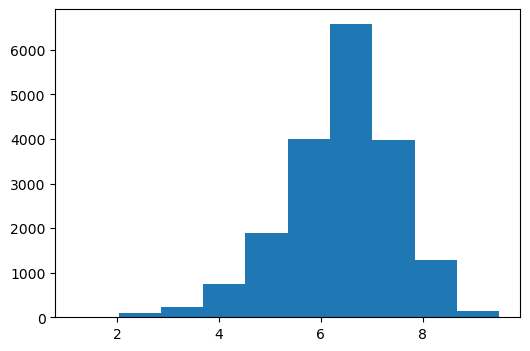

In [96]:
plt.figure(figsize=(6, 4))
plt.hist(x=df.note_moyenne)
plt.show()

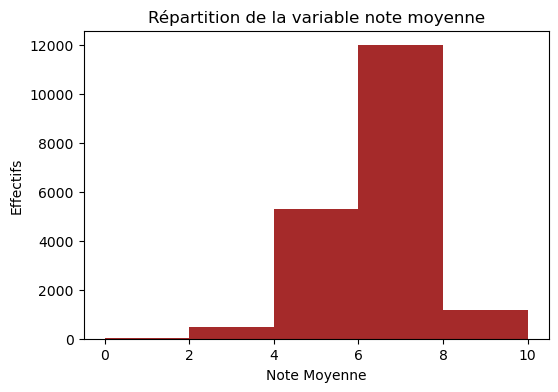

In [97]:
plt.figure(figsize=(6, 4))
plt.hist(x=df.note_moyenne, bins=range(0, 11, 2), color="brown")
plt.xlabel("Note Moyenne")
plt.ylabel("Effectifs")
plt.title("Répartition de la variable note moyenne")
plt.show()

Pour représenter plusieurs variables on passe une liste de valeurs en argument  

**Préparation de la liste des valeurs**

In [98]:
grouped_by_type = df.groupby("type", observed=True).note_moyenne

# Une liste des valeurs pour chaque type
note_moyenne_grouped = [
    grouped_by_type.get_group('movie'), 
    grouped_by_type.get_group('tv')
]

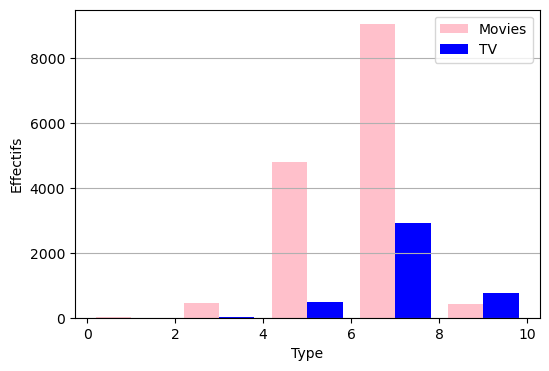

In [99]:
plt.figure(figsize=(6, 4))
plt.hist(note_moyenne_grouped, bins=range(0, 11, 2), 
         color=["pink", "blue"], label=["Movies", "TV"])
plt.xlabel("Type")
plt.ylabel("Effectifs")
plt.legend()
plt.grid(axis="y")
plt.show()

**Préparation de la liste des valeurs -- en dynamique**  

Utile si on ne connaît pas les différentes modalités de la variable `type` ou si elles sont amenées à changer.

```python
grouped_by_type_2 = df.groupby("type", observed=True).note_moyenne

# Créer une liste des valeurs pour toutes les catégories automatiquement
note_moyenne_grouped = [v for _, v in grouped_by_type_2]

# Tracer l'histogramme
plt.hist(note_moyenne_grouped, ..., label=grouped_by_type_2.groups.keys())
```

### Boxplot

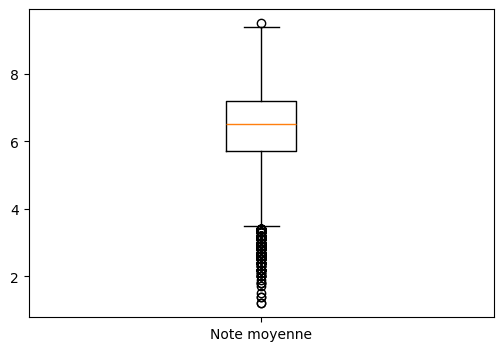

In [100]:
plt.figure(figsize=(6, 4))
plt.boxplot(x=df.note_moyenne, tick_labels=["Note moyenne"])
plt.show()

On peut ajouter un marqueur pour la moyenne

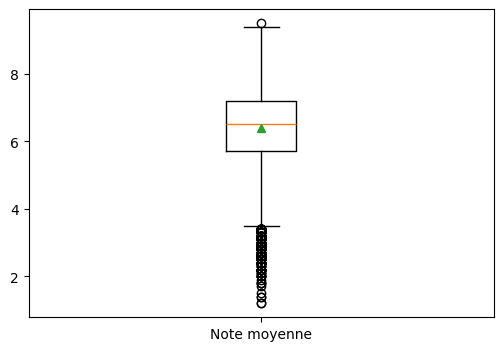

In [101]:
plt.figure(figsize=(6,4))
plt.boxplot(x=df.note_moyenne, tick_labels=["Note moyenne"], 
            showmeans=True)
plt.show()

Pour avoir plusieurs boxes sur le même graphique il faut passer une liste

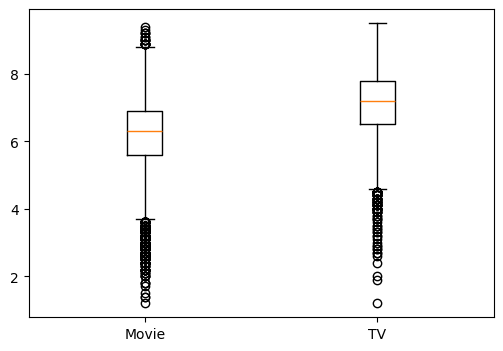

In [102]:
grouped_by_type = df.groupby("type", observed=True).note_moyenne
plt.figure(figsize=(6, 4))
plt.boxplot(x=[grouped_by_type.get_group("movie"), 
               grouped_by_type.get_group("tv")], 
            tick_labels=["Movie", "TV"])
plt.show()

### Pratique  

Faire un graphique de la répartition des notes moyennes pour le genre comédie et drame.  
D'abord sous forme d'histogramme, puis de boxplot.

## Représentation d'une variable qualitative / catégorielle

### Bar

Représentation des effectifs de chaque modalité de la variable.

In [103]:
type_effectifs = df.type.value_counts()
type_effectifs

type
movie    14736
tv        4221
Name: count, dtype: int64

on va représenter ces valeurs

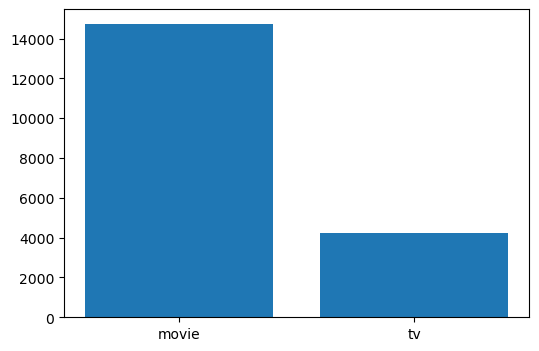

In [104]:
plt.figure(figsize=(6, 4))
plt.bar(x=type_effectifs.index, height=type_effectifs)
plt.show()

barh pour des barres horizontales (avec arguments y et width à place de x et height)

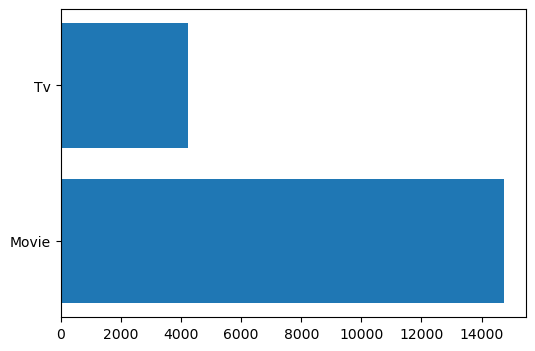

In [105]:
plt.figure(figsize=(6, 4))
plt.barh(y=type_effectifs.index.str.capitalize(), 
         width=type_effectifs)
plt.show()

La méthode `.str` est une propriété des objets `pandas.Series` lorsqu'ils contiennent des chaînes de caractères. Elle permet d'accéder à des méthodes spécifiques pour manipuler ces chaînes de manière vectorisée, c'est-à-dire sur chaque élément de la série.  

- `.str` agit comme un pont entre une `pandas.Series` et les méthodes Python pour manipuler les chaînes (comme .capitalize(), .lower(), .replace(), etc.).
- Elle rend possible l'application de transformations sur chaque élément d'une série sans boucle explicite.

### Pie

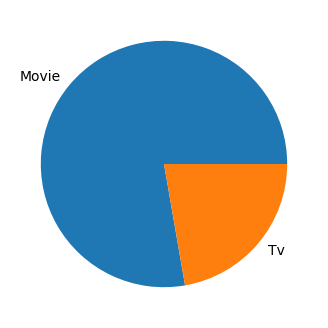

In [106]:
plt.figure(figsize=(6, 4))
plt.pie(x=type_effectifs, 
        labels=type_effectifs.index.str.capitalize())
plt.show()

### Pratique

Faire un graphique en barres des effectifs de chaque genre pour le type film. Ne faire afficher que les 10 premiers. Des barres horizontales sont plus appropriées.

In [107]:
genre_effectifs = df.loc[df.type == "movie"].genres.value_counts()
genre_effectifs_selected = genre_effectifs[:10]

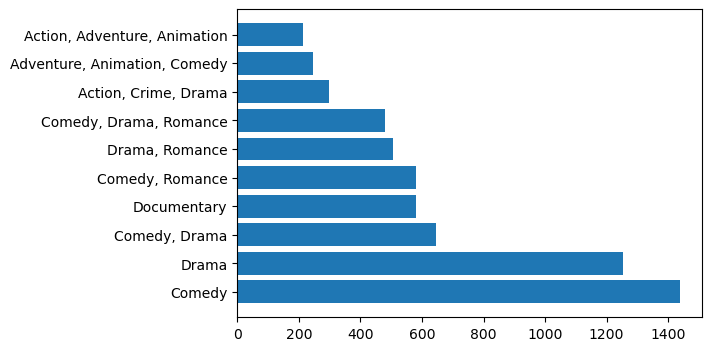

In [108]:
plt.figure(figsize=(6, 4))
plt.barh(y=genre_effectifs_selected.index, width=genre_effectifs_selected)
plt.show()

## Deux variables quantitatives

### Scatter plot  

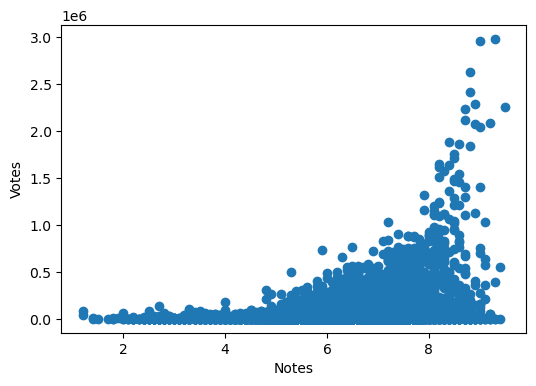

In [109]:
plt.figure(figsize=(6, 4))
plt.scatter(x=df.note_moyenne, y=df.nb_votes)
plt.xlabel("Notes")
plt.ylabel("Votes")
plt.show()

### Line plot

In [110]:
evol_notes = df.loc[df.type == "movie"].groupby(
    "annee_diffusion").note_moyenne.mean()
evol_notes

annee_diffusion
1913    7.000000
1917    7.300000
1918    7.200000
1919    6.950000
1920    6.750000
          ...   
2020    6.062230
2021    6.050052
2022    6.006798
2023    5.997532
2024    5.947089
Name: note_moyenne, Length: 105, dtype: float64

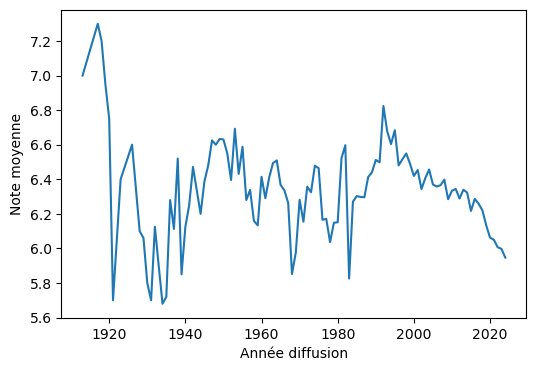

In [111]:
plt.figure(figsize=(6, 4))
plt.plot(evol_notes)
plt.xlabel("Année diffusion")
plt.ylabel("Note moyenne")
plt.show()

**Plusieurs courbes sur le même graphique**  

In [112]:
evol_notes_2 = df.groupby(
    ["annee_diffusion", "type"], observed=True).note_moyenne.mean()
evol_notes_2.head(3)  # donne une sortie multi-index (multi-niveaux)

annee_diffusion  type 
1913             movie    7.0
1917             movie    7.3
1918             movie    7.2
Name: note_moyenne, dtype: float64

In [113]:
# Réinitialiser l'index pour récupérer un dataframe
evol_notes_df = evol_notes_2.reset_index()
evol_notes_df.head(3)

,annee_diffusion,type,note_moyenne
0,1913,movie,7.0
1,1917,movie,7.3
2,1918,movie,7.2


Il suffit d'appeler plusieurs fois plt.plot()

In [114]:
movies = evol_notes_df.loc[evol_notes_df["type"] == "movie"]
tv = evol_notes_df.loc[evol_notes_df["type"] == "tv"]

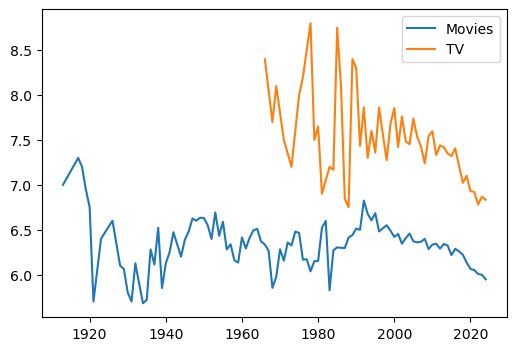

In [115]:
plt.figure(figsize=(6, 4))
plt.plot(movies.annee_diffusion, movies.note_moyenne, label="Movies")
plt.plot(tv.annee_diffusion, tv.note_moyenne, label="TV")
plt.legend()
plt.show()

### Pratique

Dans un line plot, affiche la courbe d'évolution du nombre total de votes pour chaque type

In [116]:
evol_votes = df.groupby(["annee_diffusion", "type"], observed=True).nb_votes.sum()
evol_votes = evol_votes.reset_index()
evol_votes.head(5)

,annee_diffusion,type,nb_votes
0,1913,movie,1484
1,1917,movie,2411
2,1918,movie,2153
3,1919,movie,1901
4,1920,movie,2655


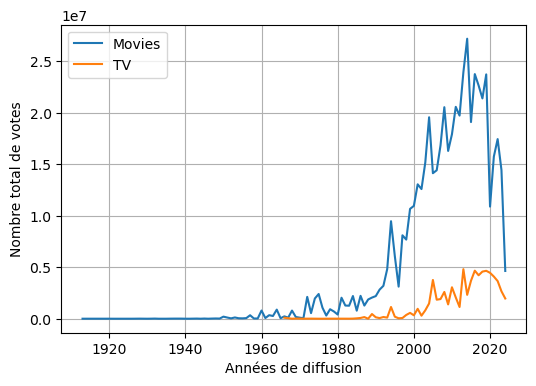

In [117]:
votes_movies = evol_votes.loc[evol_votes.type == "movie"]
votes_tv = evol_votes.loc[evol_votes.type == "tv"]

plt.figure(figsize=(6, 4))
plt.plot(votes_movies.annee_diffusion, votes_movies.nb_votes, label="Movies")
plt.plot(votes_tv.annee_diffusion, votes_tv.nb_votes, label="TV")
plt.xlabel("Années de diffusion")
plt.ylabel("Nombre total de votes")
plt.legend()
plt.grid()
plt.show()

## Deux graphiques sur la même figure

On utilise plt.subplots au lieu de plt.figure et on utilise la programmation objet

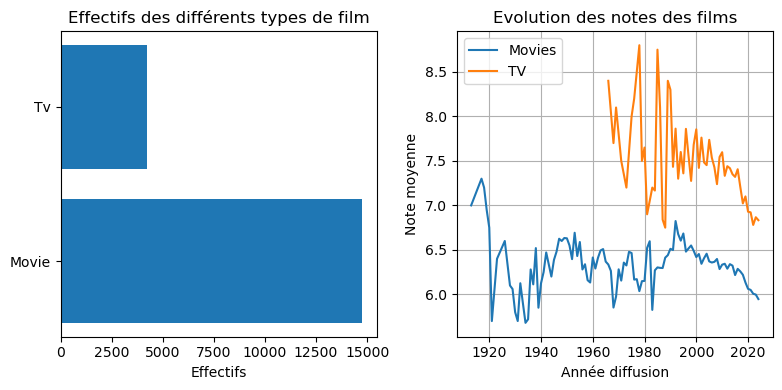

In [118]:
fig, (g0, g1) = plt.subplots(1, 2, figsize=(8, 4))

g0.barh(y=type_effectifs.index.str.capitalize(), 
         width=type_effectifs)
g0.set_xlabel("Effectifs")
g0.set_title("Effectifs des différents types de film")

g1.plot(movies.annee_diffusion, movies.note_moyenne, label="Movies")
g1.plot(tv.annee_diffusion, tv.note_moyenne, label="TV")
g1.set_xlabel("Année diffusion")
g1.set_ylabel("Note moyenne")
g1.set_title("Evolution des notes des films")
g1.grid()
g1.legend()

fig.tight_layout() # optimise les espaces
fig.savefig("img/deux_graphs_sur_meme_figure.png", dpi=300)
plt.show()

```python
fig, (g0, g1) = plt.subplots(1, 2, figsize=(8, 4))

g0.barh(y=type_effectifs.index.str.capitalize(), 
         width=type_effectifs)
g0.set_xlabel("Effectifs")
g0.set_title("Effectifs des différents types de film")

g1.plot(movies.annee_diffusion, movies.note_moyenne, label="Movies")
g1.plot(tv.annee_diffusion, tv.note_moyenne, label="TV")
g1.set_xlabel("Année diffusion")
g1.set_ylabel("Note moyenne")
g1.set_title("Evolution des notes des films")
g1.grid()
g1.legend()

fig.tight_layout() # optimise les espaces
plt.show()
```

![Graphiques](img/deux_graphs_sur_meme_figure.png)

Pour enregistrer un graphique, on utilise `plt.savefig` (programmation fonctionnelle) ou `fig.savefig(nom)` (programmation objet)

Arguments :

- dpi : Résolution en points par pouce (300 pour une qualité optimale).
- bbox_inches="tight" : Ajuste les marges pour éviter de couper les étiquettes.


```python
fig.savefig("deux_graphs_sur_meme_figure.png", dpi=300)
```

**Choix du format selon l'utilisation** : 

- PNG : Graphiques pour le web ou les présentations.
- PDF ou SVG : Graphiques à insérer dans des documents ou pour l'impression.
- JPG : Cas où un format compressé est nécessaire (par exemple, pour économiser de l'espace).
- TIFF : Utilisations spécifiques nécessitant un format haute qualité (par exemple, dans les publications scientifiques).

### Pratique 

Mettre deux graphiques déjà représentés dans une même figure et enregistrer la figure au format pdf.

# Seaborn

<img src="img/seaborn.svg" alt="Seaborn" style="width: 50%"/>

- librairies basée sur pandas et matplotlib
- permet de faire des graphiques en simplifiant les commandes
- permet de faire des réprésentations de plusieurs variables dans un graphique 2D
- page de l'API: [ici](https://seaborn.pydata.org/api.html)

par convention 

```python
import seaborn as sns
```
puis pour définir un style par défaut aux graphiques
```python
sns.set(style="darkgrid")
```

In [119]:
sns.set(style="darkgrid")

## Histplot

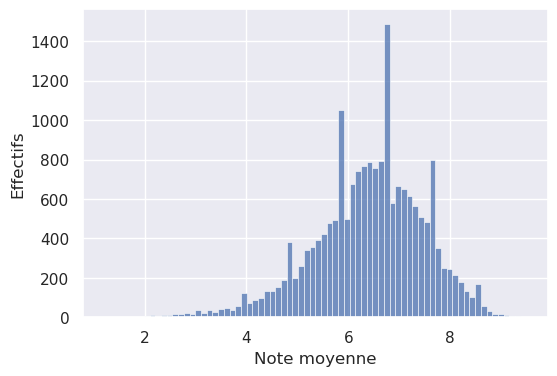

In [120]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="note_moyenne")
plt.xlabel("Note moyenne")
plt.ylabel("Effectifs")
plt.show()

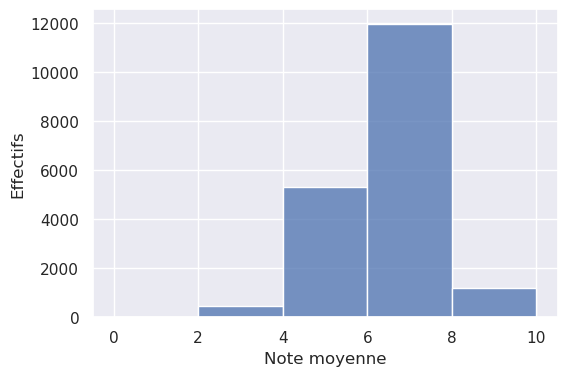

In [121]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="note_moyenne", bins=range(0, 11, 2))
plt.xlabel("Note moyenne")
plt.ylabel("Effectifs")
plt.show()

Utilisation de l'argument *hue* pour différencier selon modalités d'une autre variable

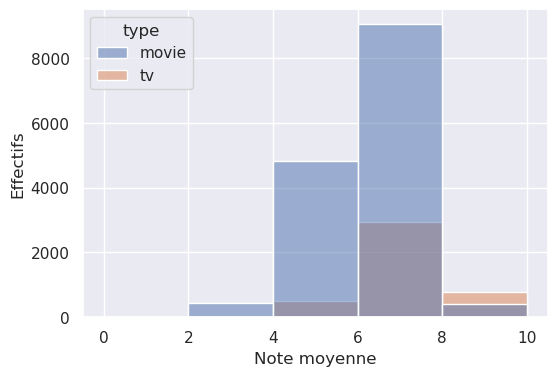

In [122]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="note_moyenne", bins=range(0, 11, 2), 
             hue="type")
plt.xlabel("Note moyenne")
plt.ylabel("Effectifs")
plt.show()

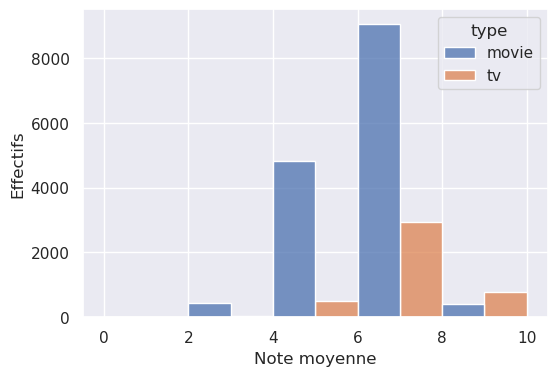

In [123]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="note_moyenne", bins=range(0, 11, 2), 
             hue="type", multiple="dodge")
plt.xlabel("Note moyenne")
plt.ylabel("Effectifs")
plt.show()

## Boxplot

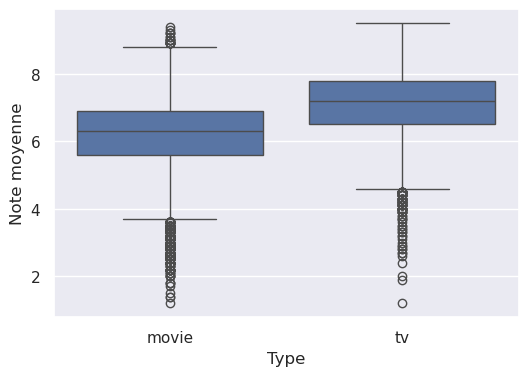

In [124]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="type", y="note_moyenne")
plt.xlabel("Type")
plt.ylabel("Note moyenne")
plt.show()

## Violinplot

Une **violinplot** est une extension de la boxplot qui ajoute une représentation de la densité des données.

- Combine une boxplot centrée avec une kdeplot (fonction de densité noyau) de chaque côté.
- Permet de visualiser à la fois le résumé statistique et la forme de la distribution.

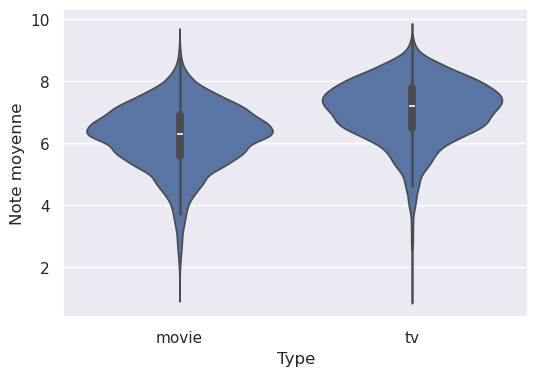

In [125]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x="type", y="note_moyenne")
plt.xlabel("Type")
plt.ylabel("Note moyenne")
plt.show()

## Stripplot

Le **stripplot** est un graphique utilisé pour afficher la répartition des points individuels d'une variable en fonction d'une autre.

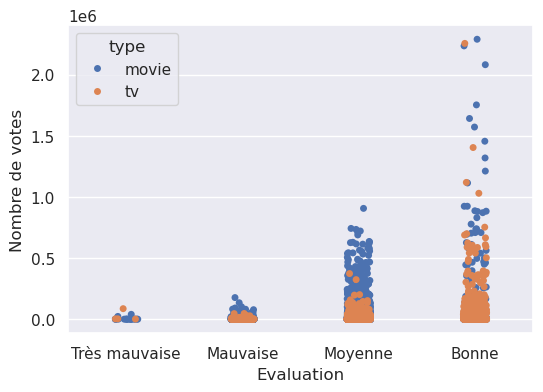

In [126]:
plt.figure(figsize=(6, 4))
sns.stripplot(
    data=df.loc[(df.pays_diffusion.str.contains("FR"))], 
              x="evaluation", y="nb_votes", hue="type")
plt.xlabel("Evaluation")
plt.ylabel("Nombre de votes")
plt.show()

## Scatterplot

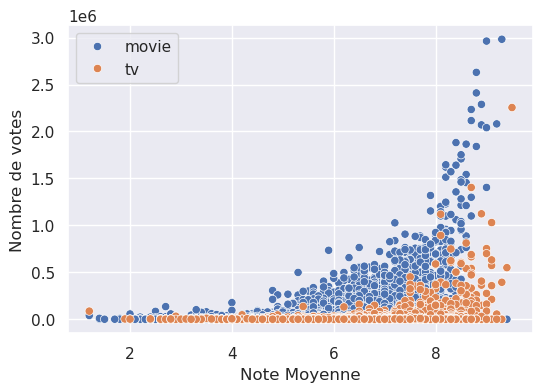

In [127]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="note_moyenne", y="nb_votes", hue="type")
plt.xlabel("Note Moyenne")
plt.ylabel("Nombre de votes")
plt.legend()
plt.show()

Avec style pour des markers qui dépendent des valeurs d'une autre série

In [128]:
df["periode_diffusion"] = pd.cut(
    df.annee_diffusion, bins=range(1900, 2051, 50))

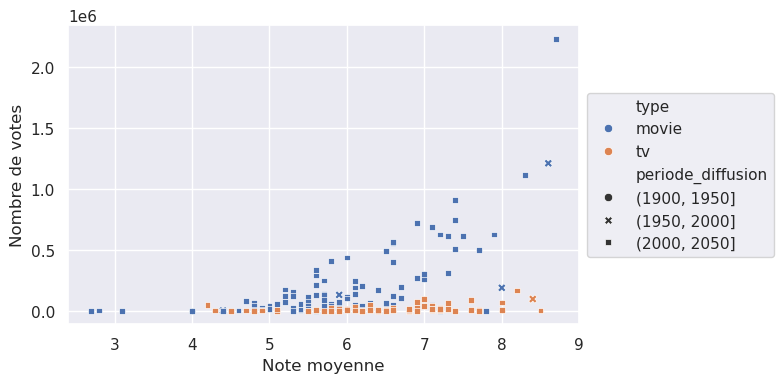

In [129]:
plt.figure(figsize=(8, 4))
ax = sns.scatterplot(
    data=df.loc[(df.pays_diffusion.str.contains("FR")) & (df.genres.str.contains("Sci-Fi"))],
    x="note_moyenne",
    y="nb_votes",
    hue="type",
    style="periode_diffusion"
)
ax.set_xlabel("Note moyenne")
ax.set_ylabel("Nombre de votes")

# Déplacement de la légende à droite
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Ajuster les marges pour éviter le chevauchement
plt.savefig("img/sns_scatterplot.png", dpi=300)
plt.show()

```python
plt.figure(figsize=(8, 4))
ax = sns.scatterplot(
    data=df.loc[(df.pays_diffusion.str.contains("FR")) & (df.genres.str.contains("Sci-Fi"))],
    x="note_moyenne", y="nb_votes",
    hue="type", style="periode_diffusion")
ax.set_xlabel("Note moyenne")
ax.set_ylabel("Nombre de votes")

# Déplacement de la légende à droite
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Ajuster les marges pour éviter le chevauchement
plt.show()
```

![Scatterplot Seaborn](img/sns_scatterplot.png)

## Lineplot

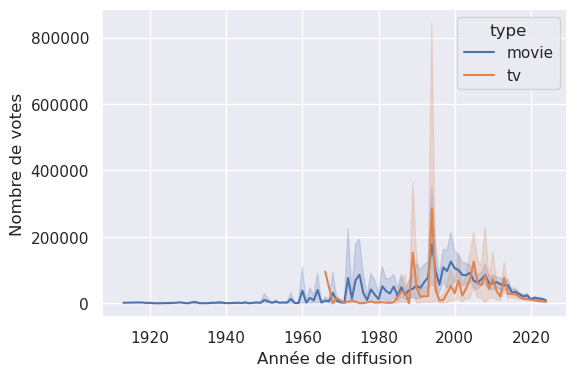

In [130]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, 
             x="annee_diffusion", y="nb_votes", 
             hue="type")
plt.xlabel("Année de diffusion")
plt.ylabel("Nombre de votes")
plt.show()

## regplot

un scatter plot avec une droite qui représente l'estimation de la relation linéraire entre les deux variables

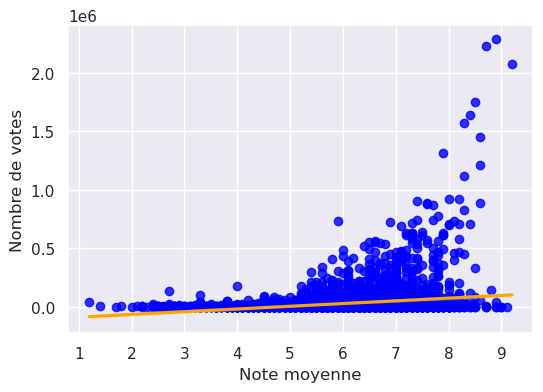

In [131]:
plt.figure(figsize=(6, 4))

sns.regplot(
    data=df.loc[(df.type == "movie") & (df.pays_diffusion.str.contains("FR"))], 
    x="note_moyenne", y="nb_votes", 
    scatter_kws={"color":"blue"}, line_kws={"color": "orange"})

plt.xlabel("Note moyenne")
plt.ylabel("Nombre de votes")
plt.savefig("img/sns_regplot.png", bbox_inches="tight")
plt.show()

```python
plt.figure(figsize=(6, 4))

sns.regplot(
    data=df.loc[(df.type == "movie") & (df.pays_diffusion.str.contains("FR"))], 
    x="note_moyenne", y="nb_votes", 
    scatter_kws={"color":"blue"}, line_kws={"color": "orange"})
    
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de votes")
plt.show()
```

![Regplot](img/sns_regplot.png)

## FacetGrid

Les objets FacetGrid permettent : 

- de créer des sous-graphiques (facettes) en fonction d'une ou plusieurs variables catégorielles
- de visualiser des relations complexes entre variables dans des ensembles de données segmentés
- de garder une structure cohérente entre tous les graphiques (alignement des axes, légendes partagées)

La création d'un FacetGrid se fait en plusieurs étapes :

- Définir les facettes avec col, row, ou les deux.
- Mapper une fonction de traçage (par exemple, sns.scatterplot) sur chaque facette.

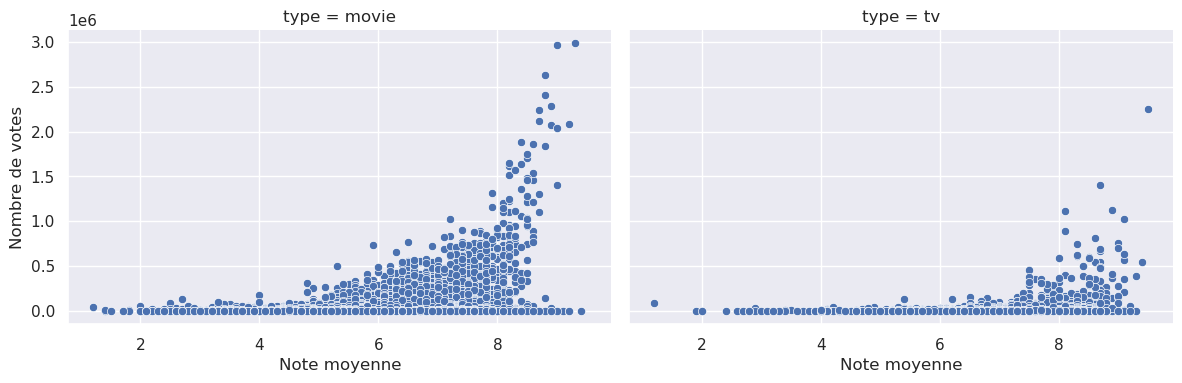

In [132]:
g = sns.FacetGrid(df, col="type", height=4, aspect=1.5)
g.map(sns.scatterplot, "note_moyenne", "nb_votes")
g.set_axis_labels("Note moyenne", "Nombre de votes")
plt.show()

**Autre exemple**  

Avec un dataset fourni par seaborn.

In [133]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


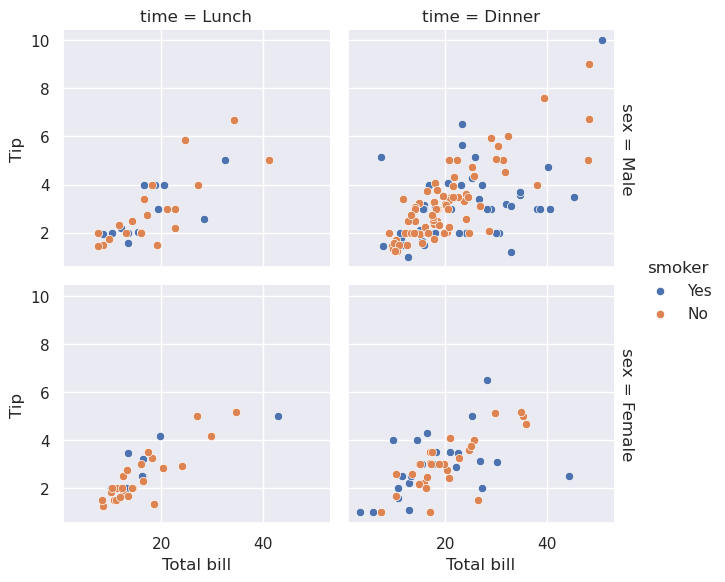

In [134]:
g = sns.FacetGrid(
    data=tips, col="time", row="sex", hue="smoker", 
    height=3, aspect=1.1, margin_titles=True
)
g.map(sns.scatterplot, "total_bill", "tip")
g.set_axis_labels("Total bill", "Tip")
g.add_legend()
plt.savefig("img/sns_facetgrid.png", bbox_inches="tight")
plt.show()

```python
g = sns.FacetGrid(
    data=tips, col="time", row="sex", hue="smoker", 
    height=4, aspect=1.2, margin_titles=True
)
g.map(sns.scatterplot, "total_bill", "tip")
g.set_axis_labels("Total bill", "Tip")
g.add_legend()

plt.show()
```

![Facetgrid Tips](img/sns_facetgrid.png)

## Seaborn Objects 

Depuis la version 0.12 de Seaborn (actuellement version 0.13.2) introduction de **Seaborn Objects Interface**. C'est une interface introduite pour offrir un style de programmation plus déclaratif et flexible pour les visualisations. Elle permet de spécifier les éléments d'un graphique de manière progressive et modulaire, similaire à des bibliothèques comme ggplot2 en R.  

C'est une alternative au style procédural classique de Seaborn (avec des fonctions comme sns.scatterplot ou sns.lineplot).

<https://seaborn.pydata.org/tutorial/objects_interface.html>

Par convention 

```python
from seaborn import objects as so
```

**Exemple**

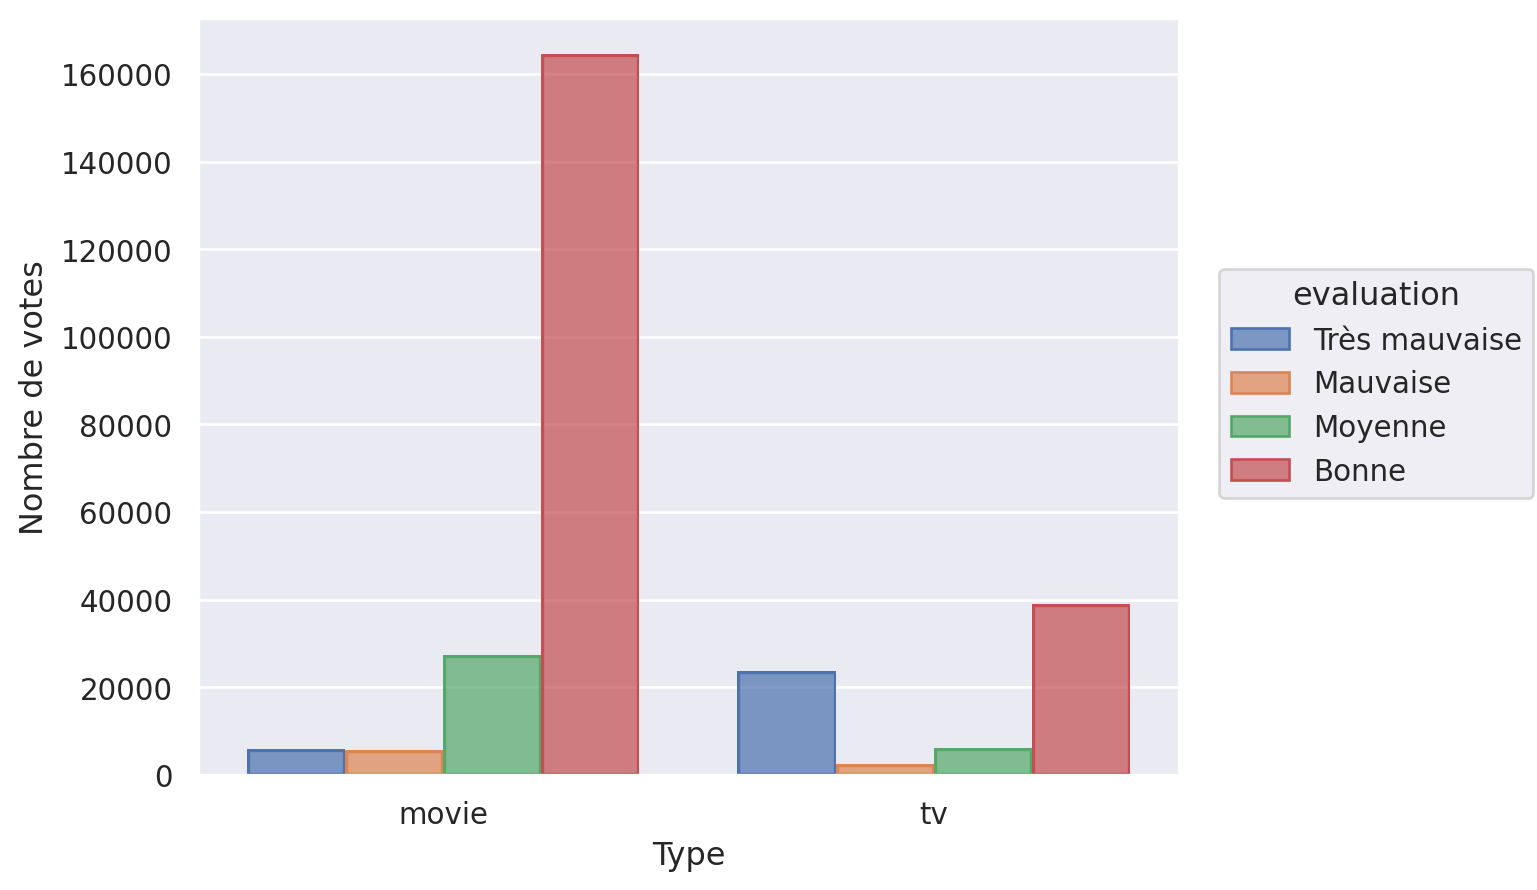

In [135]:
(
    so.Plot(data=df, x="type", y="nb_votes")
    .add(so.Bar(), so.Agg(), so.Dodge(), color="evaluation")
    .label(x="Type", y="Nombre de votes")
)

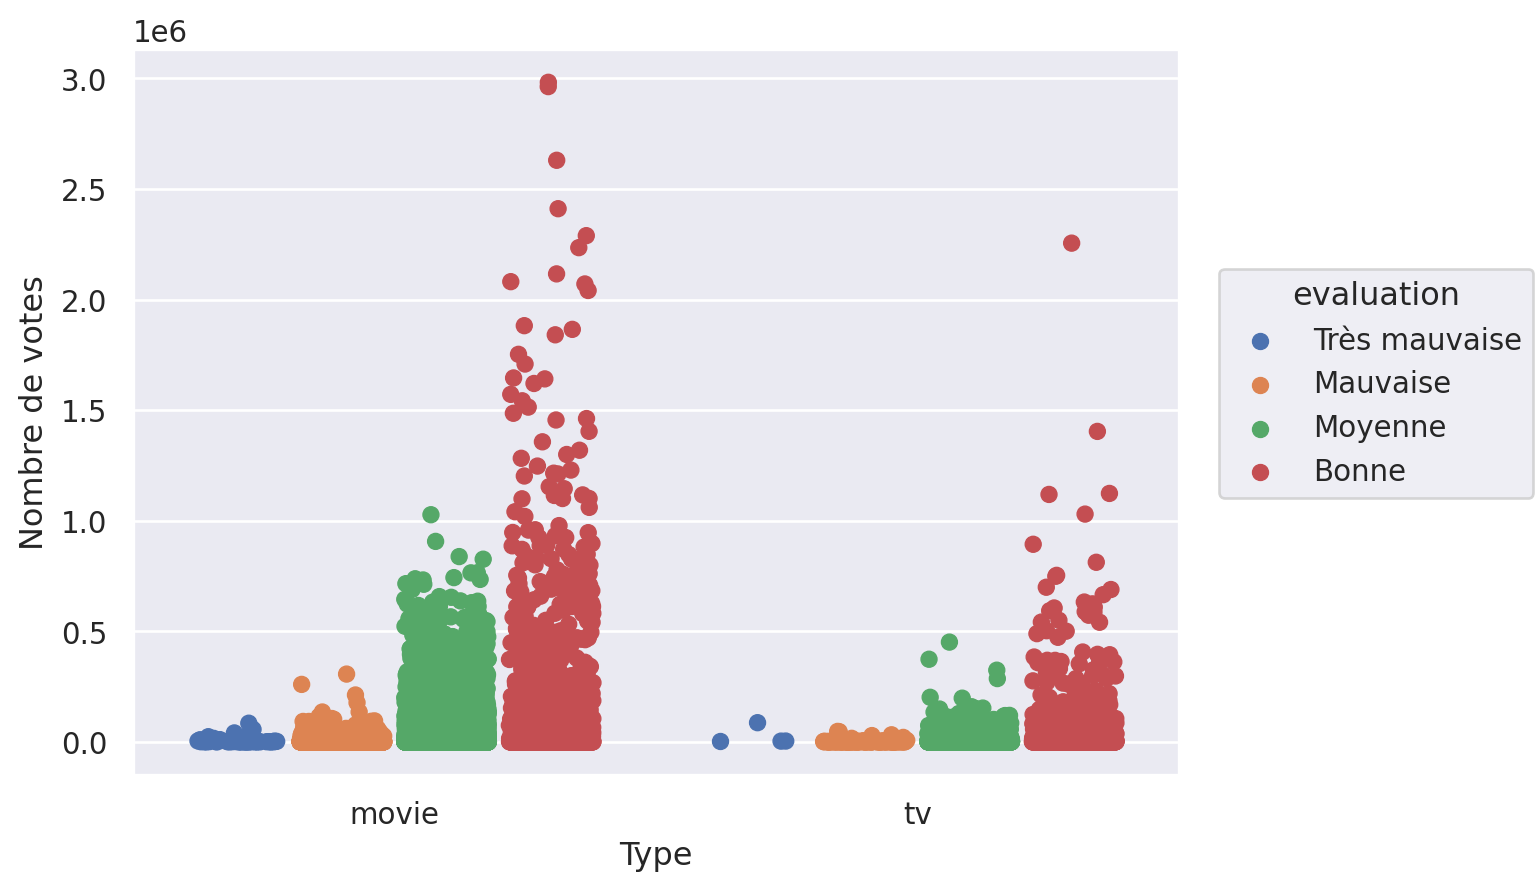

In [136]:
(
    so.Plot(data=df, x="type", y="nb_votes")
    .add(so.Dot(), so.Jitter(), so.Dodge(), color="evaluation")
    .label(x="Type", y="Nombre de votes")
)

## Pratique  

- boxplot du nombre de votes par type
- même graphique qu'au dessus mais en utilisant un violinplot
- barplot du nombre moyen de votes pour chaque période de diffusion (1900-1950, 1950-2000, 200-2050), avec une barre par type. Essayer avec sns.barplot() puis avec searborn.objects.

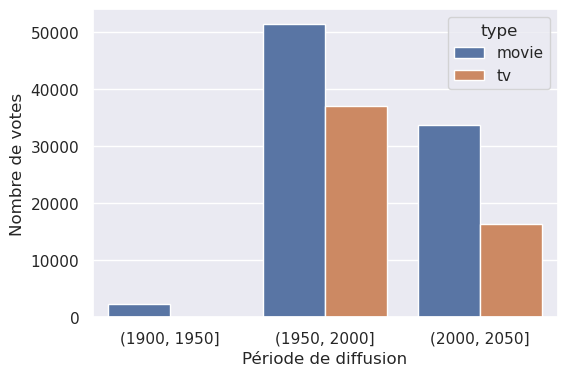

In [137]:
plt.figure(figsize=(6, 4))
g = sns.barplot(data=df, x="periode_diffusion", y="nb_votes", hue="type", errorbar=None)
g.set_xlabel("Période de diffusion")
g.set_ylabel("Nombre de votes")
plt.show()

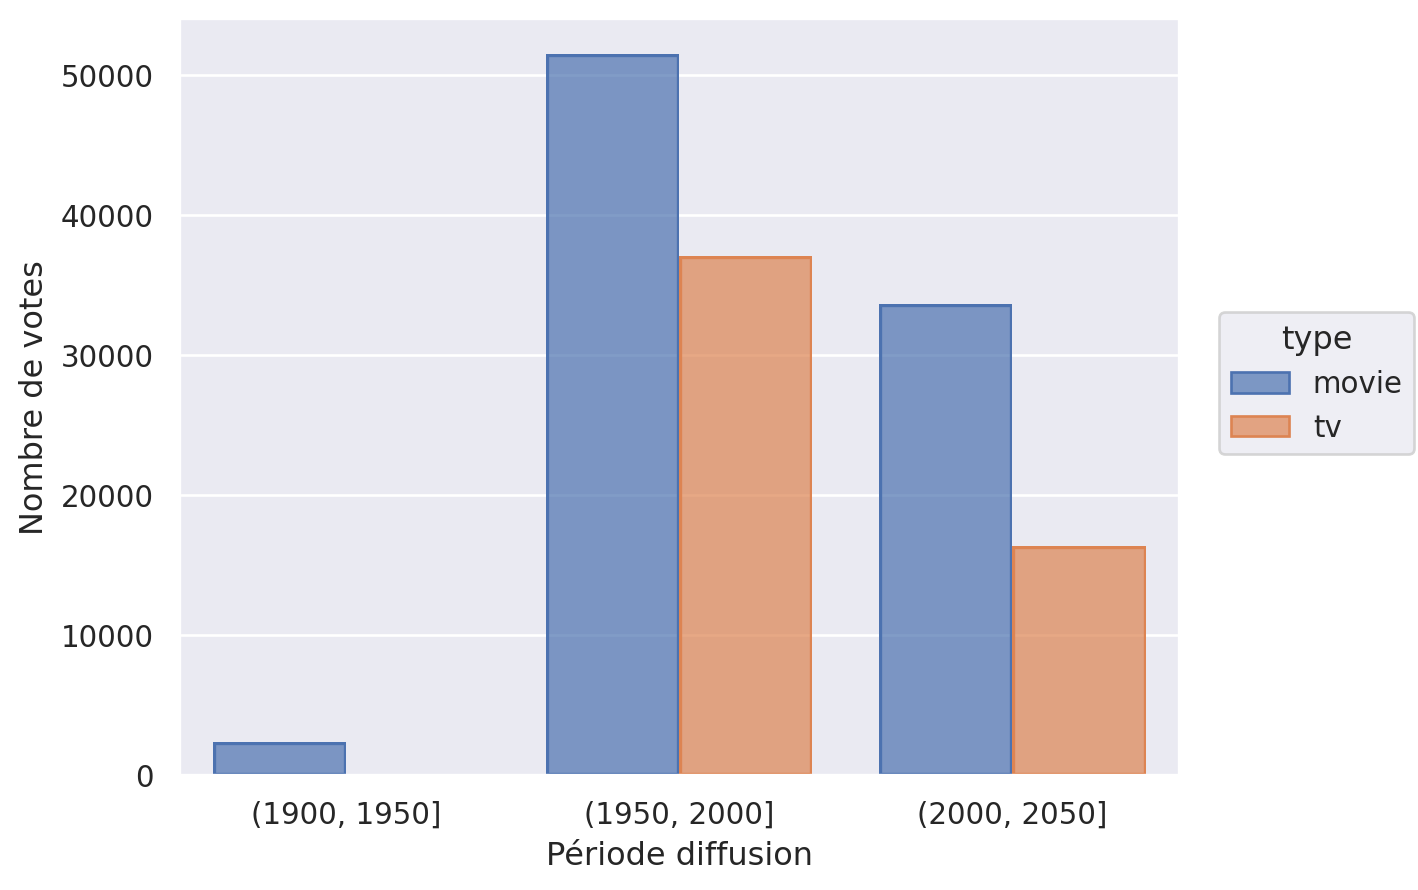

In [138]:
(
    so.Plot(df, x="periode_diffusion", y="nb_votes", color="type")
    .add(so.Bar(), so.Agg("mean"), so.Dodge())
    .label(x="Période diffusion", y="Nombre de votes")
)

# Pour aller plus loin 

- [scipy](#/6) : tests statistiques
- [statsmodels](#/7) : modèles économétriques
- [scikit-learn](#/8) : réduction de dimensions, classification
- [sympy](#/9) : calculs symboliques
- [tensorflow](#/10) : machine learning, deep learning


# SciPy

<img src="img/scipy.png" alt="SciPy logo" style="width: 50%"/>

Bibliothèque scientifique, construite sur NumPy, utilisée pour :

- **calcul numérique avancé**
    + Optimisation (minimisation et maximisation de fonctions).
    + Résolution de systèmes d'équations différentielles (ODEs).
- **statistiques**
    + Tests statistiques (t-test, chi², ANOVA, etc.).
    + Génération de distributions de probabilité.
- **intégration et de l'interpolation**
    + Calcul d'intégrales (simple et multiple).
    + Interpolation linéaire ou spline.
- **traitement du signal**
    + Filtrage, transformation de Fourier rapide (FFT).
    + Détection de pics, analyse spectrale.

<https://scipy.org/>

| **Sous-module** | **Description** |
|-----------------|-----------------|
| `scipy.cluster` | Algorithmes de clustering |
| `scipy.constants` | Constantes physiques et mathématiques |
| `scipy.fft` | Transformées de Fourier discrètes |
| `scipy.fftpack` | Routines de Transformée de Fourier rapide (legacy) |
| `scipy.integrate` | Intégration et solveurs d'équations différentielles ordinaires |
| `scipy.interpolate` | Interpolation et splines de lissage |
| `scipy.io` | Entrée et sortie de données |
| `scipy.linalg` | Algèbre linéaire |
| `scipy.ndimage` | Traitement d'image N-dimensionnel |
| `scipy.odr` | Régression orthogonale par moindres carrés |
| `scipy.optimize` | Optimisation et routines de recherche de racines |
| `scipy.signal` | Traitement du signal |
| `scipy.sparse` | Matrices creuses et routines associées |
| `scipy.spatial` | Structures de données spatiales et algorithmes |
| `scipy.special` | Fonctions spéciales |
| `scipy.stats` | Distributions statistiques et fonctions associées |


In [139]:
from scipy import stats

grouped_by_type = df.loc[df.pays_diffusion.str.contains("FR")].groupby(
    "type", observed=True).note_moyenne
grouped_by_type.agg("mean")

type
movie    6.130954
tv       6.934459
Name: note_moyenne, dtype: float64

In [140]:
stats.ttest_ind(grouped_by_type.get_group("movie"), grouped_by_type.get_group("tv"))

TtestResult(statistic=-31.629264528446935, pvalue=1.9631797818264798e-206, df=7634.0)

# StatsModels

![Statsmodels](img/statsmodels.svg)

Bibliothèque utilisée pour :

- **Régression linéaire et non linéaire**.
- **Modélisation des séries temporelles** (ARIMA, SARIMAX, etc.).
- **Tests statistiques** (T-test, ANOVA, etc.).
- **Modèles linéaires généralisés** (GLM).
- **Régressions robustes et modèles à effet mixte**.

<https://www.statsmodels.org>

In [141]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Régression linéaire (OLS)
model = smf.ols(
    "note_moyenne ~ C(type) + nb_votes", 
    data=df).fit()

In [142]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           note_moyenne   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1701.
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:34:25   Log-Likelihood:                -27068.
No. Observations:               18957   AIC:                         5.414e+04
Df Residuals:                   18954   BIC:                         5.416e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1375      0.009    713.926      0.000       6.121       6.154
C(type)[T.tv]     0.8714      0.018     49.360      0.000       0.837       0.906
nb_votes       2.107e-06   6.16e-08     34.228      0.000    1.99e-06    2.23e-06
==============================================================================
Omnibus:                     1772.295   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2623.538
Skew:                          -0.726   Prob(JB):                         0.00
Kurtosis:                       4.101   Cond. No.                     3.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# scikit-learn

<img src="img/scikit_learn.png" style="width: 50%" alt="scikit-learn">

Bibliothèque dédiée à l'apprentissage automatique (Machine Learning). Elle fournit des outils simples et efficaces pour :

- **Classification** : Modèles pour prédire des catégories (SVM, Random Forest, etc.).
- **Régression** : Modèles pour prédire des valeurs continues (Linear Regression).
- **Clustering** : Identifier des groupes dans des données (KMeans, DBSCAN).
- **Réduction de dimension** : PCA, t-SNE, pour simplifier les données.
- **Prétraitement** : Standardisation, encodage, gestion des données manquantes.
- **Validation croisée** : Évaluation et sélection de modèles robustes.

<https://scikit-learn.org>

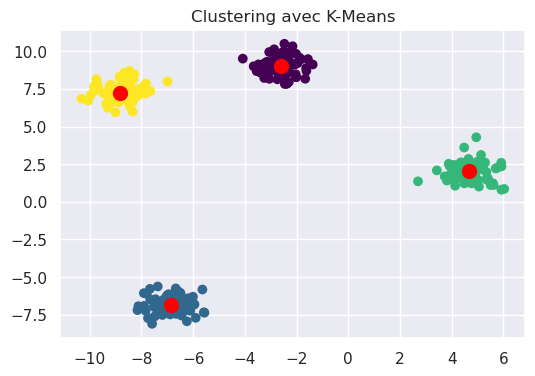

In [143]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs  # Données simulées

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualisation
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="red")
plt.title("Clustering avec K-Means")
plt.savefig("img/sklearn_kmeans.png", bbox_inches="tight", dpi=300)
plt.show()

```python
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs  # Données simulées

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualisation
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], s=100, c="red")
plt.title("Clustering avec K-Means")
plt.show()
```

![sklearn kmean](img/sklearn_kmeans.png)

# sympy

<img src="img/Sympy.png" style="width: 25%" alt="Sympy"/>


Bibliothèque dédiée au **calcul symbolique**. Elle permet de manipuler des expressions mathématiques de manière symbolique, contrairement aux bibliothèques numériques comme NumPy.

- **Manipulation algébrique** :  Simplification, développement, factorisation.
- **Résolution d'équations** :  Résolution symbolique ou numérique d'équations.
- **Calcul différentiel** :  Dérivées, intégrales, séries de Taylor.
- **Algèbre linéaire** :  Matrices, déterminants, valeurs propres.
- **Calcul matriciel symbolique** :  Inversion, multiplication symbolique de matrices.
- **Plotting** :  Tracé de fonctions mathématiques.

<https://www.sympy.org/fr/index.html>

### Simplification, développement, factorisation

In [191]:
from sympy import symbols, simplify, expand, factor, init_printing
from IPython.display import display, Math

# Variables symboliques
x, y = symbols("x y")
expr = (x**2 + 2*x + 1) / (x + 1)

$f=\frac{x^2+2x+1}{x+1}$

**Simplification** : `simplify`

In [195]:
simplified = simplify(expr)
display(Math(latex(simplified)))

<IPython.core.display.Math object>

**Développement** : `expand`

In [194]:
expanded = expand((x + 1)**3)
display(Math(latex(expanded)))

<IPython.core.display.Math object>

**Factorisation** : `factor`

In [196]:
factored = factor(x**2 + 2*x + 1)
display(Math(latex(factored)))

<IPython.core.display.Math object>

### Résolutions d'équations

**Une équation**

$x^2+2x-3=0$

In [161]:
from sympy import Eq, solve

eq = Eq(x**2 + 2*x - 3, 0)
solutions = solve(eq, x)
print("Solutions :", solutions)

Solutions : [-3, 1]


**Système d'équations**

$
\begin{cases}
x + y = 5 \\
x - y = 1
\end{cases}
$


In [201]:
x, y = symbols("x y")

eq1 = Eq(x + y, 5)
eq2 = Eq(x - y, 1)

solutions = solve((eq1, eq2), (x, y))
print("Solutions :", solutions)

Solutions : {x: 3, y: 2}


### Dérivée et intégrales

Fonction : $f = x^3 + 2x^2 + x$

In [199]:
from sympy import diff, integrate

f = x**3 + 2*x**2 + x

**Dérivée** : `diff`

In [198]:
derivative = diff(f, x)
display(Math(latex(derivative)))

<IPython.core.display.Math object>

**Intégrale** : `integrate`

In [197]:
integral = integrate(f, x)
display(Math(latex(integral)))

<IPython.core.display.Math object>

# tensorflow

<img src="img/TensorFlow.png" style="width: 50%" alt="Tensor Flow">

Bibliothèque open-source de Google, utilisée pour :

- L’**apprentissage automatique** (Machine Learning).
- Le **deep learning** (Réseaux neuronaux profonds).
- Les **calculs numériques** haute performance.